### INTRO

In [1]:
# M

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk


In [3]:
df = pd.read_csv('amazon_reviews.csv')

In [4]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB
None


In [6]:
df.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [7]:
df = df.dropna()

# To reset the indices
df = df.reset_index(drop=True)

In [8]:
df.isna().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [9]:
df['overall'].value_counts()

5.0    3921
4.0     526
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

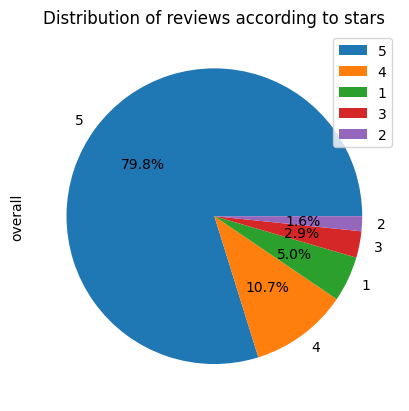

In [10]:
labels=[5,4,1,3,2]
df['overall'].value_counts().plot.pie(title="Distribution of reviews according to stars",
                                      labels=labels,autopct='%1.1f%%')

plt.legend(labels)


In [11]:
df.drop("Unnamed: 0", axis=1)


,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
1,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
2,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
3,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
4,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4908,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4909,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4910,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4911,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [12]:
# df

In [13]:
print(df.dtypes)

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object


### DATA PREPROCESSING





In [14]:
# l1 = list( [ re.sub(r'[^\w\s]', "", w) for w in ["cat", "bat@" , "123", "w#", "$", "%"] if re.sub(r'[^\w\s]', "", w)!=""])
# l1

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

def data_preprocess(text):

    # text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    # port = PorterStemmer()
    # stemmed = list(port.stem(words) for words in tokens)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
# reg = lambda x: re.sub("[^a-zA-Z]",'',str(x))
# df["reviewText"] = df["reviewText"].map(reg)

# df['reviewText'] = df['reviewText'].apply()
df['reviewText'] = df['reviewText'].apply(data_preprocess)


In [17]:
# df['reviewText'][0]

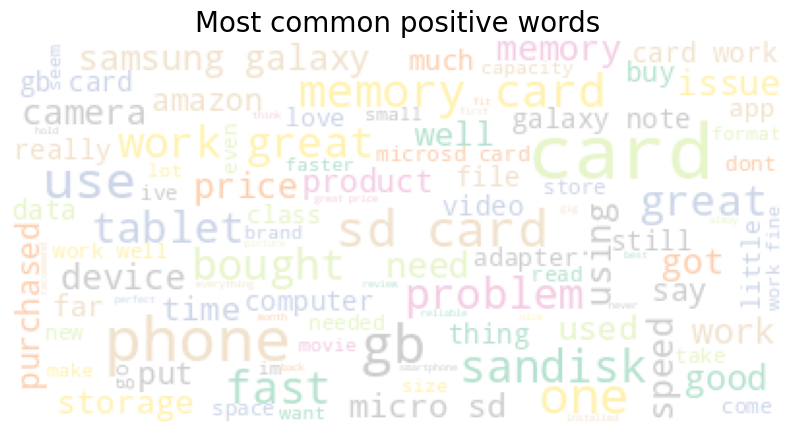

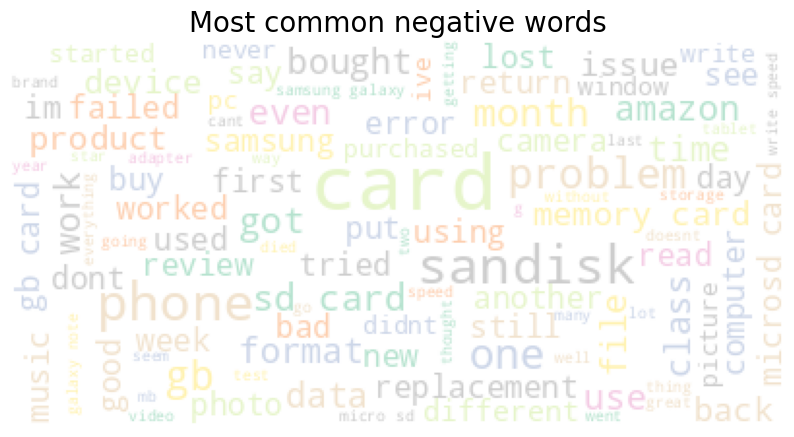

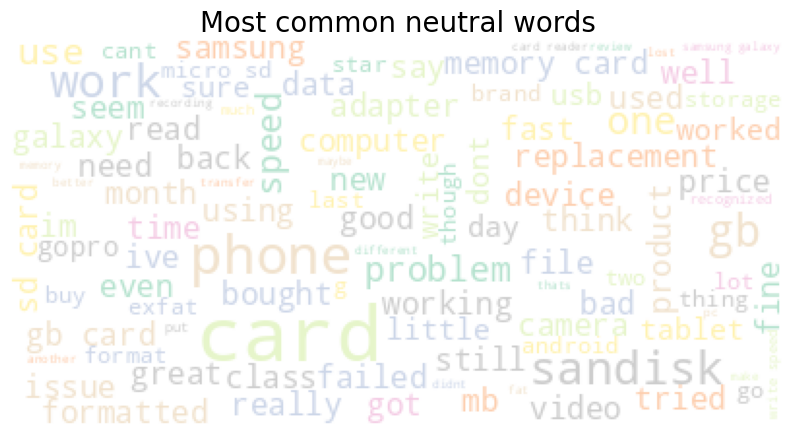

In [18]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=40)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')

negative_words=" ".join(df[df.overall <= 2]['reviewText'].values)
neutral_words=" ".join(df[df.overall==3]['reviewText'].values)
positive_words=" ".join(df[df.overall >= 3]['reviewText'].values)

generate_wordcloud(positive_words,"positive")
print("\n")
generate_wordcloud(negative_words,"negative")
print("\n")
generate_wordcloud(neutral_words,"neutral")

In [19]:
def encode_sentiment(overall):
    if overall <= 2:
        return 'negative'
    elif overall == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['overall'].apply(encode_sentiment)

In [20]:
# df

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['sentiment_encoded'], test_size=0.2, random_state=42)

### EMBEDDING

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### MODEL

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
accuracies = cross_val_score(estimator = rf, X = X_train_tfidf, y = y_train, cv = 10) # here i am applying Kfoldcrossvalidation

In [25]:
print(accuracies)
accuracies.mean()

[0.91094148 0.90585242 0.90585242 0.90585242 0.90585242 0.90585242
 0.90839695 0.90330789 0.90839695 0.90585242]


0.906615776081425

### HYPERPARAMETER TUNING

In [26]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf_gscv = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf_gscv, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train_tfidf, y_train)
# best_rf_classifier = grid_search.best_estimator_

In [27]:
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [28]:
# best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
#                                             max_depth=best_params['max_depth'],
#                                             min_samples_split=best_params['min_samples_split'],
#                                             min_samples_leaf=best_params['min_samples_leaf'],
#                                             max_features=best_params['max_features'],
#                                             random_state=42)

# best_rf.fit(X_train_tfidf, y_train)
# y_pred = best_rf_classifier.predict(X_test_tfidf)

## RESULTS

In [30]:
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)

In [31]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9074262461851476
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        68
           1       0.00      0.00      0.00        25
           2       0.91      1.00      0.95       890

    accuracy                           0.91       983
   macro avg       0.64      0.34      0.34       983
weighted avg       0.89      0.91      0.87       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## EXPLANATION

In [36]:
df.shape

(4913, 14)

In [34]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound',
       'sentiment', 'sentiment_encoded'],
      dtype='object')

In [32]:
df['helpful_yes'].value_counts()

0       4501
1        323
2         31
3         16
4         10
5          7
6          7
7          2
8          2
22         1
82         1
51         1
14         1
1568       1
112        1
60         1
1428       1
53         1
1952       1
422        1
38         1
15         1
45         1
Name: helpful_yes, dtype: int64

In [33]:
df['helpful_no'].value_counts()

0      4673
1       174
2        43
3         7
27        2
4         2
6         2
73        1
8         1
10        1
68        1
110       1
183       1
77        1
126       1
14        1
9         1
Name: helpful_no, dtype: int64

In [37]:
df['score_pos_neg_diff'].value_counts()

 0       4406
 1        272
-1        123
 2         34
-2         22
 3         11
 4          9
 5          8
-3          7
 7          2
 6          2
-5          2
 1351       1
 37         1
 12         1
 55         1
 1442       1
 85         1
 19         1
 52         1
-130        1
-102        1
 1884       1
 349        1
 28         1
 9          1
 41         1
Name: score_pos_neg_diff, dtype: int64

<ipython-input-38-91eaefb0700f>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


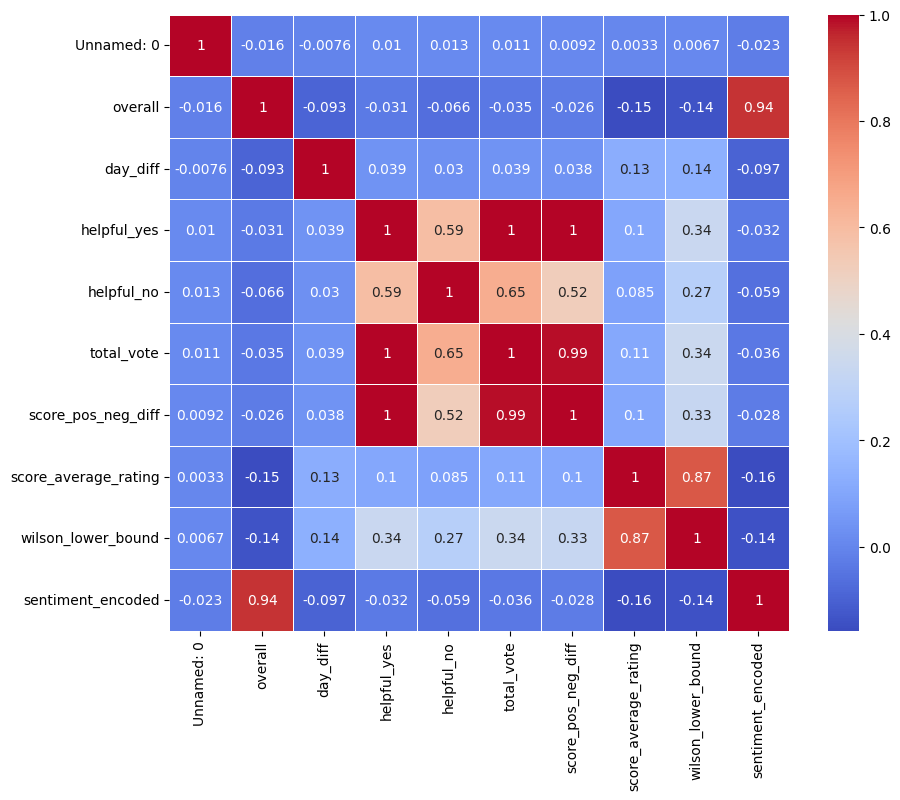

In [38]:
import seaborn as sns

data = {
    'sentiment': df['sentiment'],
    'helpful_yes': df['helpful_yes'],
    'helpful_no': df['helpful_no'],
    'score_poz_neg_diff': df['score_pos_neg_diff'],
    'wilson_score': df['wilson_lower_bound']
}

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


## ***Inferences:***


*   Less than 10% of the dataset has a non zero target attribute
*   To predict the target attribute, we need the variables, helpful_yes and helpful_no, which again have very little non zero points.(Due to which their correlation seems to be extremely high)
*   Also, performing sentiment analysis and arriving at a resulting sentiment of the user doesnt really tell us about the predicted value of helpful_yes and helpful_no.
*   Thus, I have Implemented data preprocessing, embeddings, and RandomForest classifier, which is able to predict the sentiment of a review text into its appropriate sentiment with an accuracy of about 91% on the testset.
*   Thus, the issue of classifying sentiments using RandomForest classifier has been completed successfully



The Issue asks us to predict the "Score_pos_neg_diff" column using sentiment analysis of amazon reviews with the help of RandomForestClassifier.

Firstly, I have built the sentiment analysis model of Amazon reviews with the help of the RandomForestClassifier model. This works pretty well in classifying the Amazon reviews either as Positive, Negative or Neutral with an accuracy of 91%.

Next, to predict the "Score_pos_neg_diff" column. This column is slightly tricky to predict, and below are some of my analysis:
- The "Score_pos_neg_diff" column essentially depends on the Helpful_yes and Helpful_no columns. It is the difference between the yes and no columns.
- Our target column is the "Score_pos_neg_diff" column. Our matrix of features, contains all the columns other than the target column.
- When this is the case, we really don’t have anything to predict, or use machine learning Algorithms, as the value of the target attribute can easily be obtained using a simple subtraction operation.
- Next, the dataset contains 4913 rows, out of which 4501 rows do not have a helpful_yes vote and 4673 rows do not have a helpful_no vote. This is a large percentage of the dataset, and as our target variable is predicted using these two columns, we are expected to receive inaccurate results.
- Next, when we plot a Correlation plot between the target and other variables, we can see that the column sentiment_encoded is not at all correlated with the score_pos_neg_diff column and is neither correlated with helpful_yes nor helpful_no column. This tells us that, for predicting the score_pos_neg_diff column, we do not really need the sentiment analysis part.
- Thus, I have Implemented data preprocessing, embeddings, and RandomForest classifier, which is able to predict the sentiment of a review text into its appropriate sentiment with an accuracy of about 91% on the test set.
- Thus, the issue of classifying sentiments using RandomForest classifier has been completed successfully.

The issue of predicting the score_pos_neg_diff column needs to be reconsidered by the owner, because from my end, with the existing dataset and above reasonings, it is indeed ambiguous and unlikely to be able to predict this target attribute.
